In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-dataset/Medical-Insurance.csv


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    📊 Medical Insurance Cost Data Analysis
</div>


![Medical field ](https://img.freepik.com/premium-photo/healthcare-medical-insurance-business-virtual-graph-data-growth-with-medical-financial_103164-1162.jpg?w=2000)

### -This notebook performs an **Exploratory data analysis (EDA)** on the Medical Insurance Dataset.  
  
### -The goal is to understand **factors affecting medical insurance costs** such as:
   - Age
   - Sex/gender
   - BMI (Body Mass Index)
   - Smoking habits
   - Number of children
   - Region
### ------------------------
### ✨ Executive Summary
   - Smokers pay **much higher charges** than non-smokers.  
   - Charges **increase with age** (especially after 40).  
   - Higher BMI (obesity) is associated with **increased costs**.  
   - Region has a **minor effect** compared to smoking and age.  
   - The top 10% spenders are **mostly smokers**.  
 
### 👉 These insights are useful for **insurance companies** (for premium setting) and **policy makers** (for health awareness campaigns).  


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    1. Import Libraries and Load Datase
    
</div>


In [135]:
# We start by importing the necessary Python libraries for data analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set styles
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)

# Load dataset
df = pd.read_csv(r"/kaggle/input/medical-insurance-cost-dataset/Medical-Insurance.csv")

print("Dataset shape:", df.shape)
df.head(10)


Dataset shape: (2771, 7)


,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    2. Basic Data Exploration
</div>

### Let's check:  
 - Info about the dataset (columns, datatypes)  
 - Missing values  
 - Summary statistics for numerical columns  
 - Value counts for categorical columns 

In [136]:
print("\n--- Info ---")
df.info()


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   19         2771 non-null   object 
 1   1          2771 non-null   int64  
 2   27.9       2771 non-null   float64
 3   0          2771 non-null   int64  
 4   1.1        2771 non-null   object 
 5   3          2771 non-null   int64  
 6   16884.924  2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [137]:
print("\n--- Missing values per column ---")
df.isnull().sum()


--- Missing values per column ---


19           0
1            0
27.9         0
0            0
1.1          0
3            0
16884.924    0
dtype: int64

In [138]:
print("\n--- Numeric summary ---")
df.describe()


--- Numeric summary ---


,1,27.9,0,3,16884.924
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,1.507398,30.702360,1.102129,2.559726,13260.062289
std,0.500036,6.130324,1.214845,1.130934,12153.767132
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.495000,1.000000,3.000000,9304.701900
75%,2.000000,34.770000,2.000000,4.000000,16516.743675
max,2.000000,53.130000,5.000000,4.000000,63770.428010


In [139]:
column_names = ["Age", "Gender", "BMI", "Number of Children", "Smoker", "Region", "Insurance_cost"]
df = pd.read_csv(r"/kaggle/input/medical-insurance-cost-dataset/Medical-Insurance.csv", header=None, names=column_names)

In [140]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [141]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Number of Children', 'Smoker', 'Region',
       'Insurance_cost'],
      dtype='object')

In [142]:
print("\n--- Categorical counts ---")
for col in ["Gender", "Smoker", "Region", "Number of Children"]:
    if col in df.columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())


--- Categorical counts ---

Gender value counts:
Gender
2    1406
1    1366
Name: count, dtype: int64

Smoker value counts:
Smoker
0    2201
1     564
?       7
Name: count, dtype: int64

Region value counts:
Region
4    766
3    684
1    664
2    658
Name: count, dtype: int64

Number of Children value counts:
Number of Children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64


In [143]:
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})

In [144]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost
0,19,Male,27.900,0,1,3,16884.92400
1,18,Female,33.770,1,0,4,1725.55230
2,28,Female,33.000,3,0,4,4449.46200
3,33,Female,22.705,0,0,1,21984.47061
4,32,Female,28.880,0,0,1,3866.85520
5,31,Male,25.740,0,?,4,3756.62160
6,46,Male,33.440,1,0,4,8240.58960
7,37,Male,27.740,3,0,1,7281.50560
8,37,Female,29.830,2,0,2,6406.41070
9,60,Male,25.840,0,0,1,28923.13692


In [145]:
df['Region'] = df['Region'].map({
    1: 'Northeast',
    2: 'Northwest',
    3: 'Southeast',
    4: 'Southwest'
})

In [146]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost
0,19,Male,27.900,0,1,Southeast,16884.92400
1,18,Female,33.770,1,0,Southwest,1725.55230
2,28,Female,33.000,3,0,Southwest,4449.46200
3,33,Female,22.705,0,0,Northeast,21984.47061
4,32,Female,28.880,0,0,Northeast,3866.85520
5,31,Male,25.740,0,?,Southwest,3756.62160
6,46,Male,33.440,1,0,Southwest,8240.58960
7,37,Male,27.740,3,0,Northeast,7281.50560
8,37,Female,29.830,2,0,Northwest,6406.41070
9,60,Male,25.840,0,0,Northeast,28923.13692


In [147]:
# Replacing '?' with NaN (missing values)
df.replace('?', np.nan, inplace=True)

# Converting 'children' column to numeric 
df['Number of Children'] = pd.to_numeric(df['Number of Children'], errors='coerce')

# Checking unique values
print("Unique values in 'Number of Children':", df['Number of Children'].unique())

# Fill missing values 
df['Number of Children'].fillna(0, inplace=True)  # or use df['Number of Children'].median()
print(df[['Number of Children']].head())


Unique values in 'Number of Children': [0 1 3 2 5 4]
   Number of Children
0                   0
1                   1
2                   3
3                   0
4                   0


/tmp/ipykernel_36/3766009226.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Children'].fillna(0, inplace=True)  # or use df['Number of Children'].median()


In [148]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost
0,19,Male,27.900,0,1,Southeast,16884.92400
1,18,Female,33.770,1,0,Southwest,1725.55230
2,28,Female,33.000,3,0,Southwest,4449.46200
3,33,Female,22.705,0,0,Northeast,21984.47061
4,32,Female,28.880,0,0,Northeast,3866.85520
5,31,Male,25.740,0,NaN,Southwest,3756.62160
6,46,Male,33.440,1,0,Southwest,8240.58960
7,37,Male,27.740,3,0,Northeast,7281.50560
8,37,Female,29.830,2,0,Northwest,6406.41070
9,60,Male,25.840,0,0,Northeast,28923.13692


In [149]:
df.groupby('Smoker')['Insurance_cost'].mean()

Smoker
0     8415.108404
1    32223.139764
Name: Insurance_cost, dtype: float64

In [150]:
df.groupby(['Gender','Smoker'])['Insurance_cost'].median()

Gender  Smoker
Female  0          6948.70080
        1         36193.40035
Male    0          7640.30920
        1         29045.91475
Name: Insurance_cost, dtype: float64

In [151]:


# Replace '?' with NaN everywhere
df.replace('?', np.nan, inplace=True)

# Inspect current values 
print("Raw unique smoker values:", df['Smoker'].unique())

# Function to normalize each value
def fix_smoker(val):
    if pd.isna(val):
        return np.nan
    # try numeric match first (handles int/float or numeric-strings)
    try:
        f = float(val)
        if f == 1.0:
            return 'yes'
        if f == 2.0:
            return 'no'
    except Exception:
        pass
    # string handling
    s = str(val).strip().lower()
    if s in {'1','1.0','yes','y','true','t'}:
        return 'yes'
    if s in {'2','2.0','no','n','false','f','0'}:
        return 'no'
    if s in {'yes','no'}:
        return s
    return np.nan  # unknown / unexpected value

# Apply the normalizer
df['Smoker'] = df['Smoker'].apply(fix_smoker)

# treat missing as non-smoker
df['Smoker'].fillna('no', inplace=True)

# Verifying values
print("Clean unique smoker values:", df['Smoker'].unique())
print(df['Smoker'].value_counts(dropna=False))


Raw unique smoker values: ['1' '0' nan]
Clean unique smoker values: ['yes' 'no']
Smoker
no     2208
yes     564
Name: count, dtype: int64


/tmp/ipykernel_36/615204752.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoker'].fillna('no', inplace=True)


In [152]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost
0,19,Male,27.900,0,yes,Southeast,16884.92400
1,18,Female,33.770,1,no,Southwest,1725.55230
2,28,Female,33.000,3,no,Southwest,4449.46200
3,33,Female,22.705,0,no,Northeast,21984.47061
4,32,Female,28.880,0,no,Northeast,3866.85520
5,31,Male,25.740,0,no,Southwest,3756.62160
6,46,Male,33.440,1,no,Southwest,8240.58960
7,37,Male,27.740,3,no,Northeast,7281.50560
8,37,Female,29.830,2,no,Northwest,6406.41070
9,60,Male,25.840,0,no,Northeast,28923.13692


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    3. Data Transformation & Encoding
</div>

#### We create new variables to make analysis more meaningful:
 - **Age Groups**: 18–25, 26–35, …  
 - **BMI Categories**: Underweight, Normal, Overweight, Obese  
 - **BMI × Smoker Interaction**: helps measure combined effect  

In [153]:
# Age groups
bins = [17, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["age_group"] = pd.to_numeric(df["Age"], errors='coerce')

# BMI categories
def BMI_category(BMI):
    if BMI < 18.5:
        return "Underweight"
    elif BMI < 25:
        return "Normal"
    elif BMI < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_category"] = df["BMI"].apply(BMI_category)

# BMI × Smoker interaction
df["BMI_smoker_interaction"] = df["BMI"] * (df["Smoker"] == "yes").astype(int)

In [154]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost,age_group,BMI_category,BMI_smoker_interaction
0,19,Male,27.900,0,yes,Southeast,16884.92400,19.0,Overweight,27.9
1,18,Female,33.770,1,no,Southwest,1725.55230,18.0,Obese,0.0
2,28,Female,33.000,3,no,Southwest,4449.46200,28.0,Obese,0.0
3,33,Female,22.705,0,no,Northeast,21984.47061,33.0,Normal,0.0
4,32,Female,28.880,0,no,Northeast,3866.85520,32.0,Overweight,0.0
5,31,Male,25.740,0,no,Southwest,3756.62160,31.0,Overweight,0.0
6,46,Male,33.440,1,no,Southwest,8240.58960,46.0,Obese,0.0
7,37,Male,27.740,3,no,Northeast,7281.50560,37.0,Overweight,0.0
8,37,Female,29.830,2,no,Northwest,6406.41070,37.0,Overweight,0.0
9,60,Male,25.840,0,no,Northeast,28923.13692,60.0,Overweight,0.0


In [155]:
df.tail(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost,age_group,BMI_category,BMI_smoker_interaction
2762,21,Male,32.680,2,no,Northeast,26018.95052,21.0,Obese,0.00
2763,51,Female,37.000,0,no,Southeast,8798.59300,51.0,Obese,0.00
2764,22,Male,31.020,3,yes,Southwest,35595.58980,22.0,Obese,31.02
2765,47,Female,36.080,1,yes,Southwest,42211.13820,47.0,Obese,36.08
2766,18,Female,23.320,1,no,Southwest,1711.02680,18.0,Normal,0.00
2767,47,Male,45.320,1,no,Southwest,8569.86180,47.0,Obese,0.00
2768,21,Male,34.600,0,no,Southeast,2020.17700,21.0,Obese,0.00
2769,19,Female,26.030,1,yes,Northeast,16450.89470,19.0,Overweight,26.03
2770,23,Female,18.715,0,no,Northeast,21595.38229,23.0,Normal,0.00
2771,54,Female,31.600,0,no,Southeast,9850.43200,54.0,Obese,0.00


In [156]:
df.describe()

,BMI,Number of Children,Insurance_cost,age_group,BMI_smoker_interaction
count,2772.000000,2772.000000,2772.000000,2768.000000,2772.000000
mean,30.701349,1.101732,13261.369959,39.109827,6.274939
std,6.129449,1.214806,12151.768945,14.091633,12.741137
min,15.960000,0.000000,1121.873900,18.000000,0.000000
25%,26.220000,0.000000,4687.797000,26.000000,0.000000
50%,30.447500,1.000000,9333.014350,39.000000,0.000000
75%,34.770000,2.000000,16577.779500,51.000000,0.000000
max,53.130000,5.000000,63770.428010,64.000000,52.580000


In [157]:
df.shape

(2772, 10)

<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    4. Data Visualization
</div>


#### In this section we explore relationships between variables using plots:
 - Distribution of charges  
 - Charges by smoker & sex  
 - Age vs Charges  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


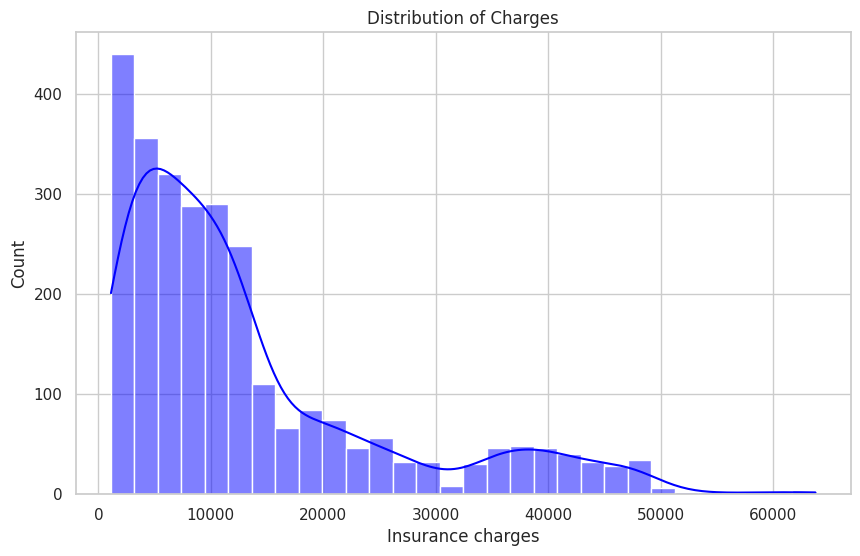

In [158]:
# Distribution of charges
plt.figure(figsize=(10,6))
sns.histplot(df["Insurance_cost"], kde=True, bins=30, color="blue")
plt.title("Distribution of Charges")
plt.xlabel("Insurance charges")
plt.ylabel("Count")
plt.show()

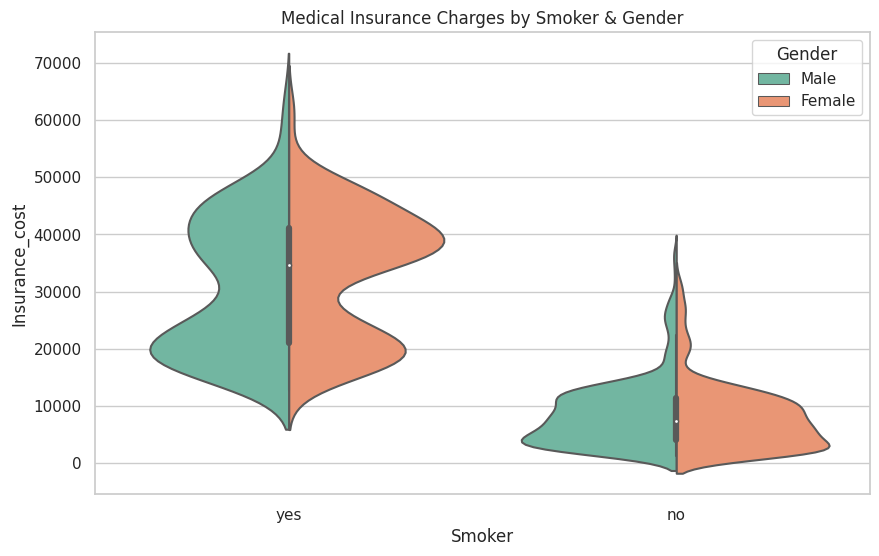

In [159]:
# Charges by smoker & sex
plt.figure(figsize=(10,6))
sns.violinplot(x="Smoker", y="Insurance_cost", hue="Gender", data=df, split=True, palette="Set2")
plt.title("Medical Insurance Charges by Smoker & Gender")
plt.show()

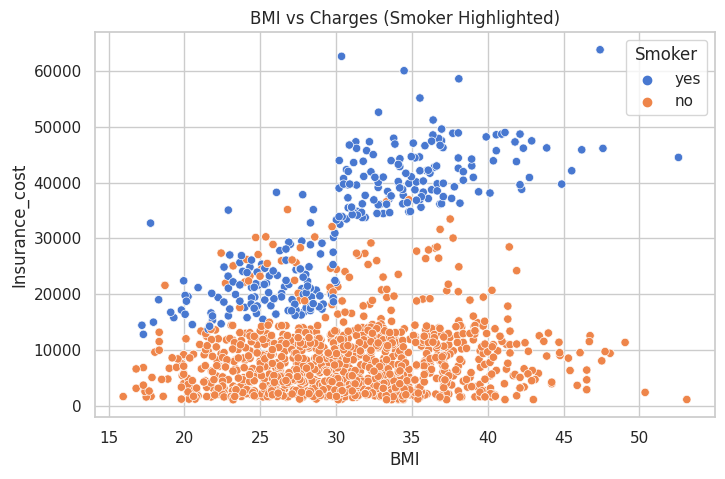

In [160]:
 # BMI vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(x="BMI", y="Insurance_cost", hue="Smoker", data=df, palette="muted")
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


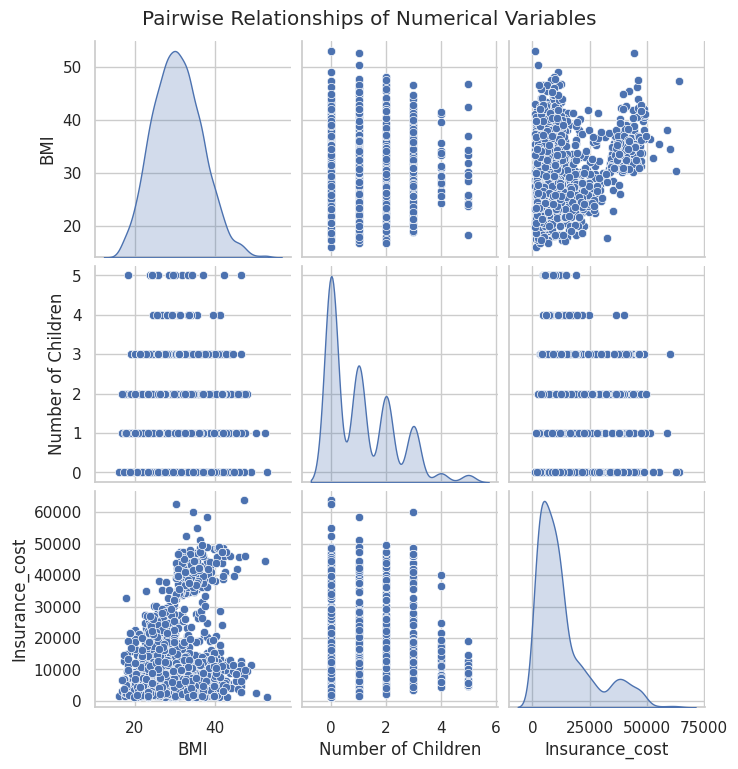

In [161]:
# Pairplot (quick overview of numerical variables)
sns.pairplot(df[["Age", "BMI", "Number of Children", "Insurance_cost"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships of Numerical Variables", y=1.02)
plt.show()

In [162]:
df.head(10)

,Age,Gender,BMI,Number of Children,Smoker,Region,Insurance_cost,age_group,BMI_category,BMI_smoker_interaction
0,19,Male,27.900,0,yes,Southeast,16884.92400,19.0,Overweight,27.9
1,18,Female,33.770,1,no,Southwest,1725.55230,18.0,Obese,0.0
2,28,Female,33.000,3,no,Southwest,4449.46200,28.0,Obese,0.0
3,33,Female,22.705,0,no,Northeast,21984.47061,33.0,Normal,0.0
4,32,Female,28.880,0,no,Northeast,3866.85520,32.0,Overweight,0.0
5,31,Male,25.740,0,no,Southwest,3756.62160,31.0,Overweight,0.0
6,46,Male,33.440,1,no,Southwest,8240.58960,46.0,Obese,0.0
7,37,Male,27.740,3,no,Northeast,7281.50560,37.0,Overweight,0.0
8,37,Female,29.830,2,no,Northwest,6406.41070,37.0,Overweight,0.0
9,60,Male,25.840,0,no,Northeast,28923.13692,60.0,Overweight,0.0


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    5. Exploratory Data Analysis
</div>


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


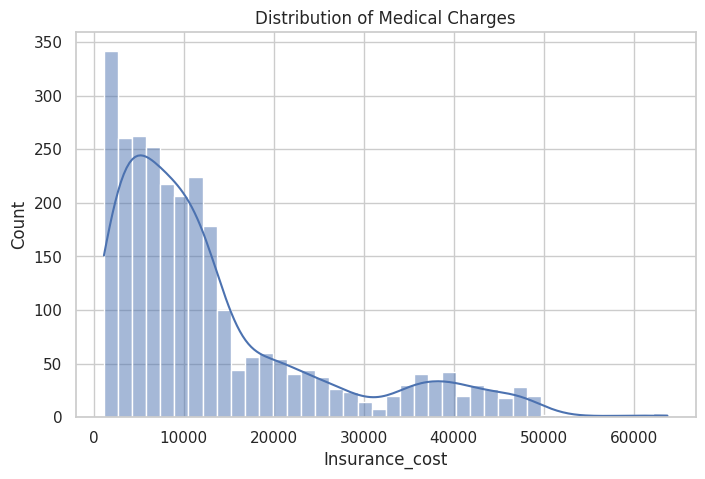

In [163]:
# Distribution of Charges
plt.figure(figsize=(8,5))
sns.histplot(df["Insurance_cost"], bins=40, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

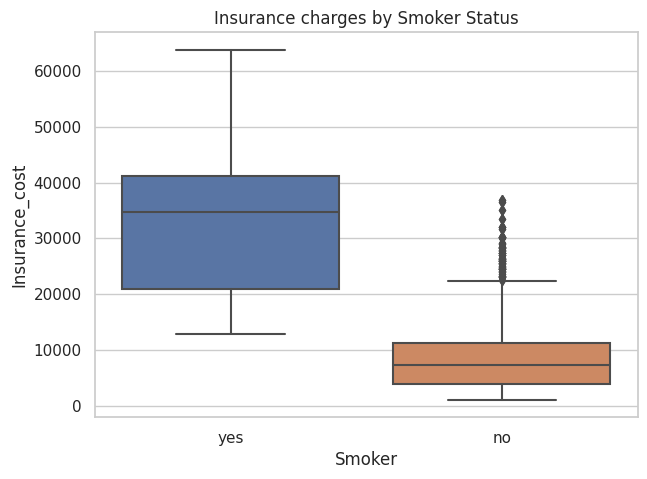

In [164]:
# Charges vs Smoker
plt.figure(figsize=(7,5))
sns.boxplot(x="Smoker", y="Insurance_cost", data=df)
plt.title("Insurance charges by Smoker Status")
plt.show()

## 🔹 Charges by Smoker Status

This **boxplot** compares medical insurance **charges** between **smokers** and **non-smokers**

> Insights:
> - Smokers have significantly **higher medical charges** compared to non-smokers.
> - This indicates that **smoking is a major factor** affecting medical insurance costs.


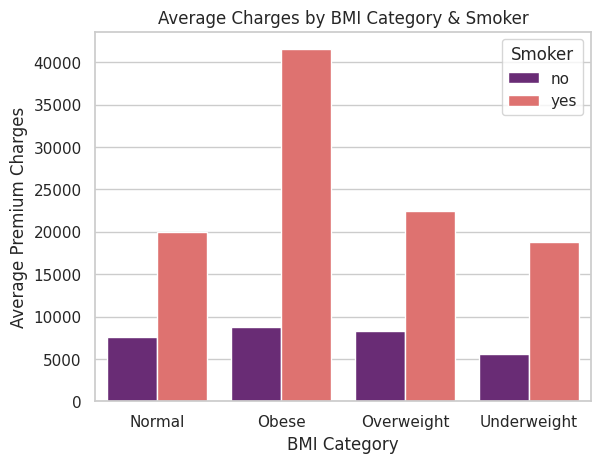

In [165]:
# Calculate mean charges per BMI category and smoker status
bmi_smoker_charges = df.groupby(['BMI_category', 'Smoker'])['Insurance_cost'].mean().reset_index()

# Bar plot
sns.barplot(x='BMI_category', y='Insurance_cost', hue='Smoker', data=bmi_smoker_charges, palette='magma')
plt.title("Average Charges by BMI Category & Smoker")
plt.ylabel("Average Premium Charges")
plt.xlabel("BMI Category")
plt.show()


In [166]:
from scipy import stats

charges_smokers = df[df["Smoker"] == "yes"]["Insurance_cost"].dropna()
charges_non = df[df["Smoker"] == "no"]["Insurance_cost"].dropna()

print("Smoker count:", len(charges_smokers))
print("Non-smoker count:", len(charges_non))

if len(charges_smokers) > 1 and len(charges_non) > 1:
    t_stat, p_val = stats.ttest_ind(charges_smokers, charges_non, equal_var=False)
    print("T-statistic:", t_stat, "P-value:", p_val)

    if p_val < 0.05:
        print("The difference is statistically significant at 5% level.")
    else:
        print("Not statistically significant.")
else:
    print("Not enough data for t-test.")


Smoker count: 564
Non-smoker count: 2208
T-statistic: 47.44545828663751 P-value: 2.898941835153105e-212
The difference is statistically significant at 5% level.


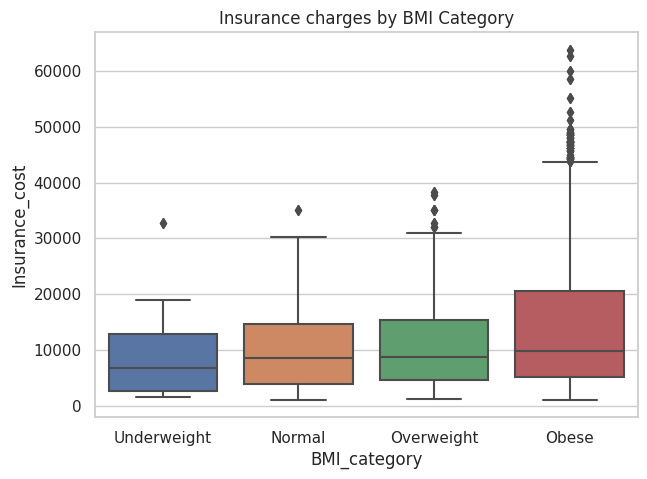

In [167]:
# Charges vs BMI Category
plt.figure(figsize=(7,5))
sns.boxplot(x="BMI_category", y="Insurance_cost", data=df, order=["Underweight","Normal","Overweight","Obese"])
plt.title("Insurance charges by BMI Category")
plt.show()

## 🔹 Charges by BMI Category

This **boxplot** visualizes the distribution of medical insurance **charges** across different **BMI categories**:

- **X-axis**: BMI categories (`Underweight`, `Normal`, `Overweight`, `Obese`).  
- **Y-axis**: Medical insurance charges.  
- **Boxplot** highlights:
  - Median charges (line inside the box)
  - Interquartile range (box)
  - Outliers (points outside the whiskers)

> Insights:
> - Individuals in higher BMI categories (Overweight and Obese) tend to have **higher medical charges**.
> - This shows a clear trend where BMI positively correlates with insurance costs, indicating potential health risk impact.


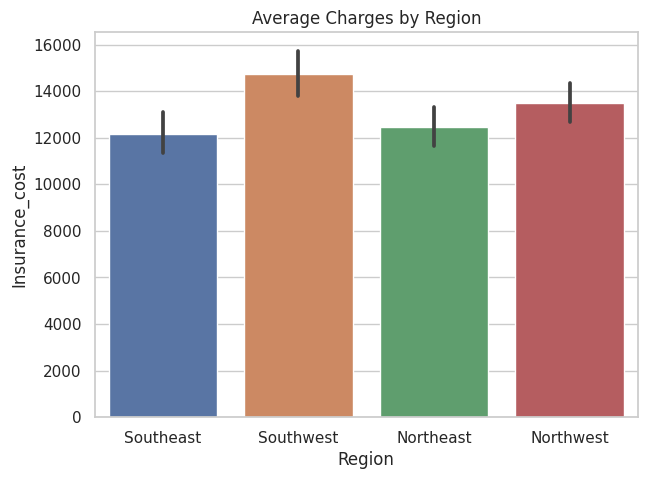

In [168]:
# Average Charges by Region
plt.figure(figsize=(7,5))
sns.barplot(x="Region", y="Insurance_cost", data=df, estimator=np.mean)
plt.title("Average Charges by Region")
plt.show()



In [169]:
print(df.head())


  Age  Gender     BMI  Number of Children Smoker     Region  Insurance_cost  \
0  19    Male  27.900                   0    yes  Southeast     16884.92400   
1  18  Female  33.770                   1     no  Southwest      1725.55230   
2  28  Female  33.000                   3     no  Southwest      4449.46200   
3  33  Female  22.705                   0     no  Northeast     21984.47061   
4  32  Female  28.880                   0     no  Northeast      3866.85520   

   age_group BMI_category  BMI_smoker_interaction  
0       19.0   Overweight                    27.9  
1       18.0        Obese                     0.0  
2       28.0        Obese                     0.0  
3       33.0       Normal                     0.0  
4       32.0   Overweight                     0.0  


In [170]:
print(df['age_group'].unique())

[19. 18. 28. 33. 32. 31. 46. 37. 60. 25. 62. 23. 56. 27. 52. 30. 34. 59.
 63. 55. 22. 26. 35. 24. 41. 38. 36. 21. 48. 40. 58. 53. 43. 64. 20. 61.
 44. 57. 29. 45. 54. 49. 47. 51. 42. 50. 39. nan]


In [171]:
print(df['Insurance_cost'].head())


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: Insurance_cost, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


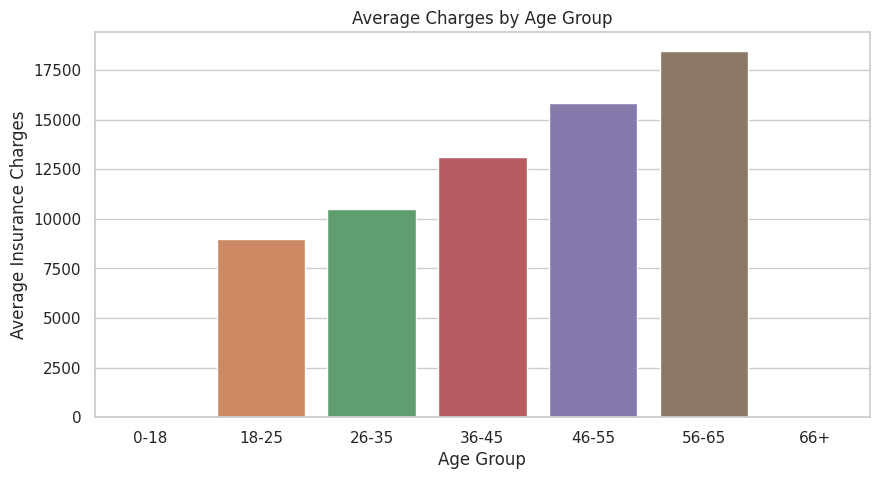

In [172]:
# Charges vs Age Group

# Clean 'age' column
# Convert age to numbers; invalid entries become NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Remove rows where age is missing
df = df.dropna(subset=['Age'])

# Clean 'charges' column
# Convert charges to numbers; invalid entries become NaN
df['Insurance_cost'] = pd.to_numeric(df['Insurance_cost'], errors='coerce')
# Remove rows where charges are missing
df = df.dropna(subset=['Insurance_cost'])

# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # ranges for age
labels = ['0-18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']  # labels
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot Average Charges by Age Group
plt.figure(figsize=(10,5))
sns.barplot(
    x='age_group',
    y='Insurance_cost',
    data=df,
    estimator=np.mean,   # calculating average charges
    errorbar=None         
)
plt.title("Average Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Insurance Charges")
plt.show()

In [173]:
print(df["age_group"].value_counts())

age_group
46-55    596
18-25    586
26-35    562
36-45    526
56-65    498
0-18       0
66+        0
Name: count, dtype: int64


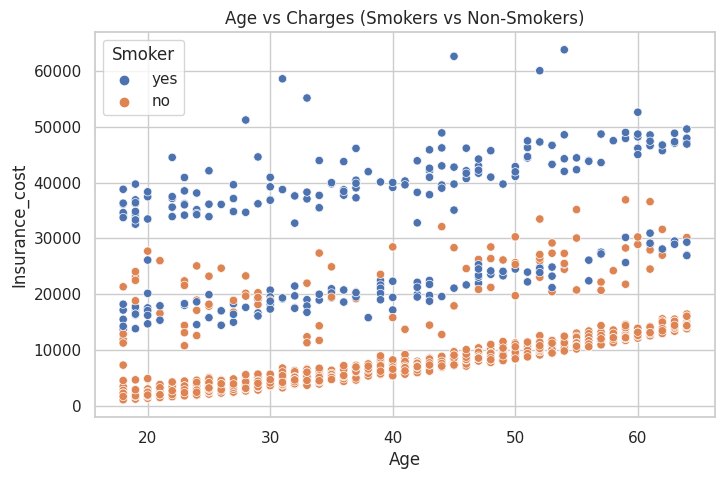

In [174]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Insurance_cost", data=df, hue="Smoker")
plt.title("Age vs Charges (Smokers vs Non-Smokers)")
plt.show()

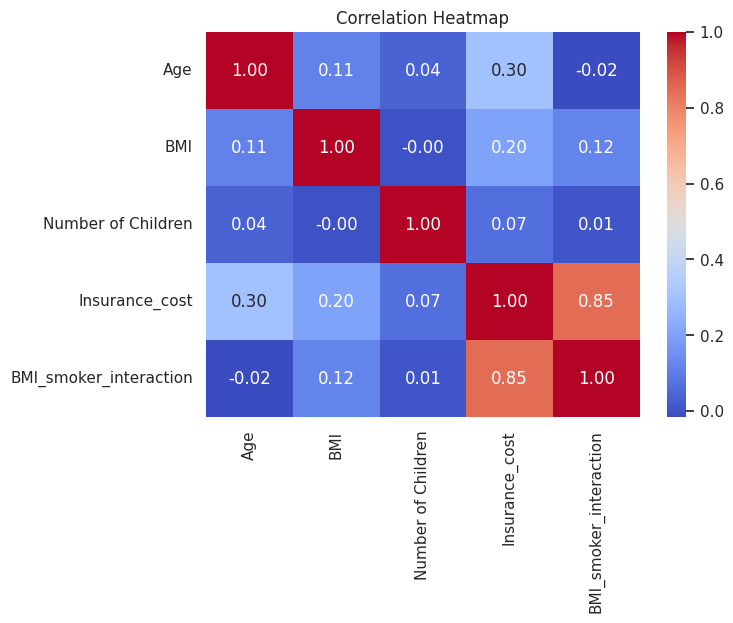

In [175]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 🔹 Correlation Heatmap

A **correlation heatmap** helps visualize the relationships between numerical features in the dataset.  
- Values range from **-1 to 1**, where:
  - `1` indicates a perfect positive correlation,
  - `-1` indicates a perfect negative correlation,
  - `0` indicates no correlation.  
- This heatmap uses the **"coolwarm"** color map to distinguish positive and negative correlations clearly.  
- **Annotations (`annot=True`)** display the correlation values for easy interpretation.  

> From this visualization, we can identify which features are strongly related to **medical charges** and to each other.


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    📈 Insights & Recommendations
</div>


### 🔹 Key Insights
1. **Smoking Status**
   - Smokers incur significantly higher medical charges compared to non-smokers.
   - The difference in charges is statistically significant, highlighting the health risk and financial impact of smoking.

2. **Age Factor**
   - Older individuals generally have higher medical charges.
   - Charges tend to increase steadily across age groups, reflecting higher health risks with age.

3. **BMI Influence**
   - Individuals in higher BMI categories (Overweight & Obese) tend to have higher medical charges.
   - The combination of high BMI and smoking leads to the highest charges.

4. **Gender Differences**
   - Minimal difference in charges between males and females when controlling for other factors like age, BMI, and smoking.
   
5. **Regional Variations**
   - Certain regions show slightly higher average charges, indicating possible regional healthcare cost differences.

### 🔹 Recommendations
1. **Preventive Health Programs**
   - Promote smoking cessation programs to reduce health risks and insurance costs.
   - Encourage healthy lifestyle interventions to manage BMI and reduce obesity-related costs.

2. **Age-Specific Insurance Plans**
   - Design insurance plans with age-based pricing to fairly reflect risk and encourage early preventive care.

3. **Targeted Awareness Campaigns**
   - Focus on regions with higher average charges to educate individuals about healthy habits and preventive measures.

4. **Regular Data Monitoring**
   - Continuously monitor medical charges across demographics to identify trends and implement data-driven health policies.

---

> 💡 These insights can help insurance providers, healthcare planners, and policymakers make informed decisions and reduce overall medical costs while improving public health outcomes.


<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    🏁 Conclusion
</div>


## 🏁 Conclusion

- This analysis provided a detailed exploration of **medical insurance charges** and the factors that influence them, such as **age, BMI, smoking status, sex, and region**.  
- Key findings indicate that **smoking and higher BMI** significantly increase medical charges, while age also shows a clear positive trend with costs.  
- Regional differences and sex showed minor variations, but overall, lifestyle factors like **smoking and obesity** are the strongest drivers of insurance costs.  
- These insights can guide **insurance providers, healthcare policymakers, and individuals** in making data-driven decisions for better health outcomes and cost management.  



<div style="
    background-color: #0E8554; 
    color: white; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    ✨ Thank You

</div>



-Thank you for visiting this project!  
- I hope this analysis provides valuable insights into **medical insurance cost trends**.  
- Feedback, suggestions, and collaborations are always welcome.  

> 💡 Feel free to explore the notebook and dataset for deeper analysis and visualization enhancements.